## Project: Chocolate Scraping with Beautiful Soup

*This project was proposed by Codecademy (www.codecademy.com) at the course "Data Science" (chapter: "Data Acquisition).*

After eating chocolate bars your whole life, you’ve decided to go on a quest to find the greatest chocolate bar in the world.


You’ve found a website (https://content.codecademy.com/courses/beautifulsoup/cacao/index.html) that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.


The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.


The rating scale is from 1-5, as described in this review guide: http://flavorsofcacao.com/review_guide.html. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.


Some questions we thought about when we found this dataset were: Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating?

In [1]:
#Exploring the webpage through getting the raw HTML, transforming into a BeautifulSoup object:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage_response = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

## Exploring the ratings:

In [9]:
#Creating a list with all the ratings:

rating_results = soup.find_all(attrs = {"class": "Rating"})
ratings = [float(rate.get_text()) for rate in rating_results[1:]]

#Showing only the first 100 results:
print(ratings[:100])

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5]


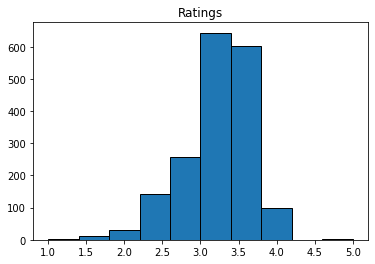

In [10]:
#Plotting a histogram to better visualize the data:

plt.hist(ratings, edgecolor = 'black')
plt.title("Ratings")
plt.show()

As we can see above, the most common ratings are between 3 to 3.7

## Exploring the companies:

In [13]:
#Finding all the tags on the webpage tha contains the company names, creating a DataFrame with a column called "Company" and printing the first 5 results:

company_names = soup.select(".Company")
companies = [name.get_text() for name in company_names[1:]]

my_dictionary = {"Company": companies, "Ratings": ratings}
df = pd.DataFrame.from_dict(my_dictionary)
print(df.head())

    Company  Ratings
0  A. Morin     3.75
1  A. Morin     2.75
2  A. Morin     3.00
3  A. Morin     3.50
4  A. Morin     3.50


In [15]:
#Grouping the DataFrame by Company and calculating the average:

average = df.groupby("Company").Ratings.mean()
print(average)

#Getting the 10 highest rated chocolate companies:
ten_highest_rated = average.nlargest(10)
print(ten_highest_rated)

Company
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Ratings, Length: 416, dtype: float64
Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


As we can see above, the company "Tobago Estate (Pralus)" is the highest rated chocolate company, according to this webpage.

## Exploring the Percentage of Cocoa:

In [16]:
#Getting all the cocoa percentages:

cocoa_percents = []
cocoa_percent_tags = soup.select(".CocoaPercent")
for result in cocoa_percent_tags [1:]:
  percents = int(float(result.get_text().strip("%")))
  cocoa_percents.append(percents)
    
#Showing only the first 100 results:
print(cocoa_percents[:100])

[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63, 70, 63, 70, 70, 60, 80, 88, 72, 55, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 70, 70, 70, 70, 60, 60, 60, 60, 60, 60, 60, 80, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 85, 85, 72, 73, 64, 66, 75, 63, 70, 68, 70, 70, 75, 70, 70, 70, 70, 70, 70, 70, 63, 70, 66, 75, 85, 50, 75, 60, 75, 75, 75, 72, 75, 75, 70]


In [17]:
#Adding a column to the DataFrame called "CocoaPercentage":

df["CocoaPercentage"] = cocoa_percents
print(df.head())

    Company  Ratings  CocoaPercentage
0  A. Morin     3.75               63
1  A. Morin     2.75               70
2  A. Morin     3.00               70
3  A. Morin     3.50               70
4  A. Morin     3.50               70


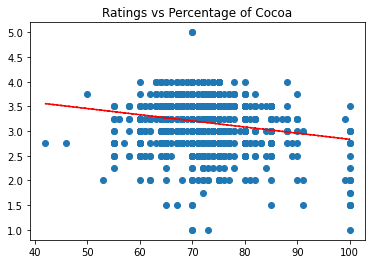

In [18]:
#Plotting a scatterplot of ratings vs percentage:

plt.scatter(df.CocoaPercentage, df.Ratings)
plt.title("Ratings vs Percentage of Cocoa")
z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

As we can see above, there's some kind of correlation between ratings and the percentage of cocoa in the chocolate bars (the ratings tend to be lower as the percentage goes higher). Also, the most rated chocolates have a percentage of cocoa between 60 to 75 approximately.